In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn import datasets, linear_model, metrics
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
#importing the dataset 'housing.csv' using a pandas dataframe
df = pd.read_csv("housing.csv")

In [3]:
df.head(10)

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
5,78,9978,OneFam,Two_Story,Above_Average,1998,Typical,926,926,678,2,1,3,1,1,-93.638925,42.060779,195500
6,41,4920,TwnhsE,One_Story,Average,2001,Typical,1338,1338,0,2,0,2,1,0,-93.633792,42.062978,213500
7,43,5005,TwnhsE,One_Story,Average,1992,Typical,1280,1280,0,2,0,2,1,0,-93.633826,42.060728,191500
8,39,5389,TwnhsE,One_Story,Average,1995,Typical,1595,1616,0,2,0,2,1,1,-93.632852,42.061120,236500
9,60,7500,OneFam,Two_Story,Average,1999,Typical,994,1028,776,2,1,3,1,1,-93.639068,42.059193,189000


In [4]:
#getting the count of the dataset
df.shape

(2413, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   2413 non-null   int64  
 1   Lot_Area       2413 non-null   int64  
 2   Bldg_Type      2413 non-null   object 
 3   House_Style    2413 non-null   object 
 4   Overall_Cond   2413 non-null   object 
 5   Year_Built     2413 non-null   int64  
 6   Exter_Cond     2413 non-null   object 
 7   Total_Bsmt_SF  2413 non-null   int64  
 8   First_Flr_SF   2413 non-null   int64  
 9   Second_Flr_SF  2413 non-null   int64  
 10  Full_Bath      2413 non-null   int64  
 11  Half_Bath      2413 non-null   int64  
 12  Bedroom_AbvGr  2413 non-null   int64  
 13  Kitchen_AbvGr  2413 non-null   int64  
 14  Fireplaces     2413 non-null   int64  
 15  Longitude      2413 non-null   float64
 16  Latitude       2413 non-null   float64
 17  Sale_Price     2413 non-null   int64  
dtypes: float

### Splitting the Housing dataset into Train-Test split

In [6]:
# setting up the random seed based on student number, this function is used to set the seed for the random number
student_number = 22210369
np.random.seed(student_number)

In [ ]:
X= df.drop['Sale_Price']
Y= df['Sale_Price']

In [8]:
# splitting the dataset into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=student_number)


In [9]:
train_dataset = pd.concat([X_train, Y_train], axis=1)
train_dataset

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
290,21,1491,TwnhsE,SFoyer,Above_Average,1972,Typical,630,630,0,1,0,1,1,0,-93.603590,41.992119,75500
1994,21,1953,Twnhs,Two_Story,Average,1973,Typical,483,483,504,1,1,2,1,0,-93.627932,42.052702,83000
2162,60,10800,OneFam,One_and_Half_Fin,Very_Good,1936,Typical,796,1096,370,2,0,3,1,1,-93.613899,42.034761,170000
1971,60,8147,TwnhsE,One_Story,Average,2005,Typical,1714,1714,0,2,0,2,1,1,-93.630070,42.058563,318000
717,64,7314,OneFam,One_Story,Average,2007,Typical,1232,1232,0,2,0,2,1,0,-93.690111,42.024327,194500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,83,10143,OneFam,One_Story,Good,1963,Typical,1380,1380,0,1,1,3,1,0,-93.607655,42.040150,154000
1570,80,8000,OneFam,Two_Story,Above_Average,1970,Typical,1008,1403,1008,2,1,4,1,1,-93.635094,42.047758,240050
27,21,1680,Twnhs,Two_Story,Average,1971,Typical,483,483,504,1,1,2,1,0,-93.627271,42.051835,96000
2161,60,10800,TwoFmCon,One_and_Half_Fin,Below_Average,1900,Fair,954,1766,648,2,0,3,2,1,-93.612404,42.035277,160000


In [10]:
#to check the datatypes of the independent variable
train_dataset.dtypes

Lot_Frontage       int64
Lot_Area           int64
Bldg_Type         object
House_Style       object
Overall_Cond      object
Year_Built         int64
Exter_Cond        object
Total_Bsmt_SF      int64
First_Flr_SF       int64
Second_Flr_SF      int64
Full_Bath          int64
Half_Bath          int64
Bedroom_AbvGr      int64
Kitchen_AbvGr      int64
Fireplaces         int64
Longitude        float64
Latitude         float64
Sale_Price         int64
dtype: object

## Explaratory Data Analysis (EDA)

In [11]:
#to check the missing values of the independent variable
train_dataset.isnull().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

there is no missing values present in the training dataset.

In [12]:
#to find out the numerical columns from the train dataset 
numerical_columns_of_House = [feature for feature in train_dataset.columns if train_dataset[feature].dtypes!='O']
train_dataset[numerical_columns_of_House]

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
290,21,1491,1972,630,630,0,1,0,1,1,0,-93.603590,41.992119,75500
1994,21,1953,1973,483,483,504,1,1,2,1,0,-93.627932,42.052702,83000
2162,60,10800,1936,796,1096,370,2,0,3,1,1,-93.613899,42.034761,170000
1971,60,8147,2005,1714,1714,0,2,0,2,1,1,-93.630070,42.058563,318000
717,64,7314,2007,1232,1232,0,2,0,2,1,0,-93.690111,42.024327,194500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,83,10143,1963,1380,1380,0,1,1,3,1,0,-93.607655,42.040150,154000
1570,80,8000,1970,1008,1403,1008,2,1,4,1,1,-93.635094,42.047758,240050
27,21,1680,1971,483,483,504,1,1,2,1,0,-93.627271,42.051835,96000
2161,60,10800,1900,954,1766,648,2,0,3,2,1,-93.612404,42.035277,160000


In [13]:
#to find out the categorical columns from the train dataset 
categorical_columns_of_House = [feature for feature in train_dataset.columns if train_dataset[feature].dtypes=='O']
train_dataset[categorical_columns_of_House]

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
290,TwnhsE,SFoyer,Above_Average,Typical
1994,Twnhs,Two_Story,Average,Typical
2162,OneFam,One_and_Half_Fin,Very_Good,Typical
1971,TwnhsE,One_Story,Average,Typical
717,OneFam,One_Story,Average,Typical
...,...,...,...,...
583,OneFam,One_Story,Good,Typical
1570,OneFam,Two_Story,Above_Average,Typical
27,Twnhs,Two_Story,Average,Typical
2161,TwoFmCon,One_and_Half_Fin,Below_Average,Fair


In [14]:
#to find out the unique temporal variables (eg: Datetime variables) from the independent training set 
year_feature = [feature for feature in X_train if 'Year' in feature]

for feature in year_feature:
    print(feature, train_dataset[feature].unique())

Year_Built [1972 1973 1936 2005 2007 1999 1950 1961 1970 1949 1992 1969 1985 1968
 1976 1926 2003 2004 1964 1996 1994 1885 1995 1920 2002 1953 1927 1998
 1960 1910 1900 1941 1997 1991 1916 1986 2008 1939 1915 1954 1978 1967
 1981 1974 1962 1977 1993 1930 1957 1956 1975 1918 2001 1959 2006 1914
 2009 1958 1948 1952 1940 1924 1965 1966 2000 1892 1955 1946 1989 1912
 1951 1932 1984 1925 1980 1971 1990 1922 1934 1923 1963 1890 1982 1880
 1947 1937 1919 1917 1945 1942 1938 1988 1935 1983 1979 1921 1928 1882
 1929 2010 1931 1872 1875 1987 1902 1895 1893 1905 1908]


In [15]:
#using describe() refers to the statistical summary of the train dataset
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot_Frontage,1689.0,55.146832,33.820508,0.000000,35.000000,60.000000,76.000000,313.000000
Lot_Area,1689.0,10210.869153,9208.114580,1300.000000,7420.000000,9375.000000,11515.000000,215245.000000
Year_Built,1689.0,1970.020130,29.542857,1872.000000,1953.000000,1972.000000,1998.000000,2010.000000
Total_Bsmt_SF,1689.0,1022.943162,415.260746,0.000000,784.000000,970.000000,1254.000000,3200.000000
First_Flr_SF,1689.0,1136.850799,362.209289,334.000000,873.000000,1064.000000,1361.000000,3228.000000
Second_Flr_SF,1689.0,347.223801,429.130023,0.000000,0.000000,0.000000,720.000000,1872.000000
Full_Bath,1689.0,1.558911,0.553098,0.000000,1.000000,2.000000,2.000000,4.000000
Half_Bath,1689.0,0.387211,0.506336,0.000000,0.000000,0.000000,1.000000,2.000000
Bedroom_AbvGr,1689.0,2.861456,0.820928,0.000000,2.000000,3.000000,3.000000,6.000000
Kitchen_AbvGr,1689.0,1.039668,0.198248,0.000000,1.000000,1.000000,1.000000,2.000000


#### Finding the columns that has discrete and Continuous variable

In [16]:
#to find the columns that are discrete 
# to check for discrete variables, we are checking the number of unique values present in each column.

discrete_feature =[feature for feature in numerical_columns_of_House if len(train_dataset[feature].unique())<50 and feature not in year_feature]
print("Discrete Variable Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variable Count: 5


['Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces']

In [17]:
train_dataset[discrete_feature].head(10)

,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces
290,1,0,1,1,0
1994,1,1,2,1,0
2162,2,0,3,1,1
1971,2,0,2,1,1
717,2,0,2,1,0
1407,3,1,5,1,1
1099,1,0,3,1,0
542,2,0,3,1,1
346,1,1,2,1,0
2128,1,1,3,1,1


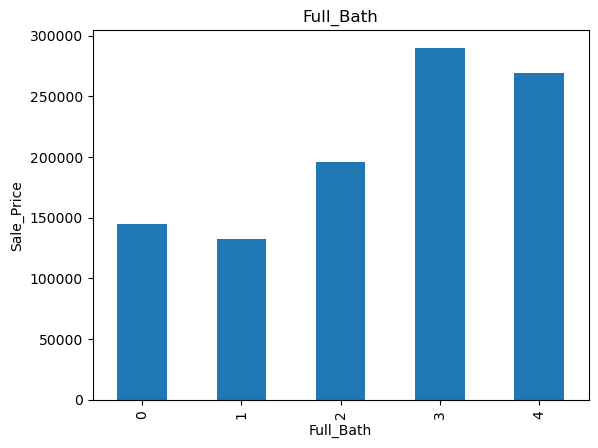

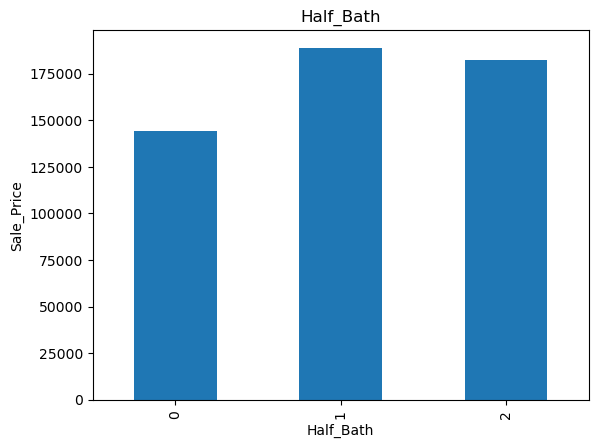

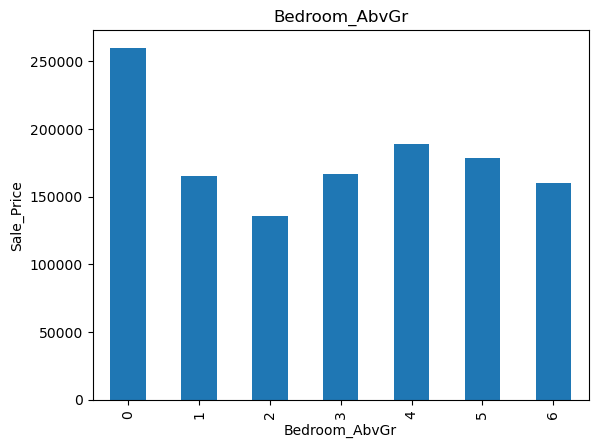

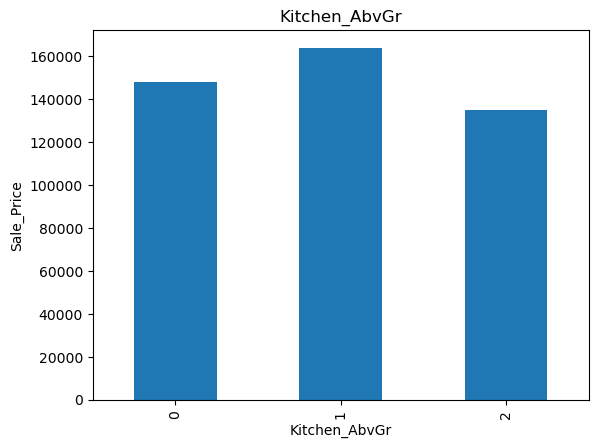

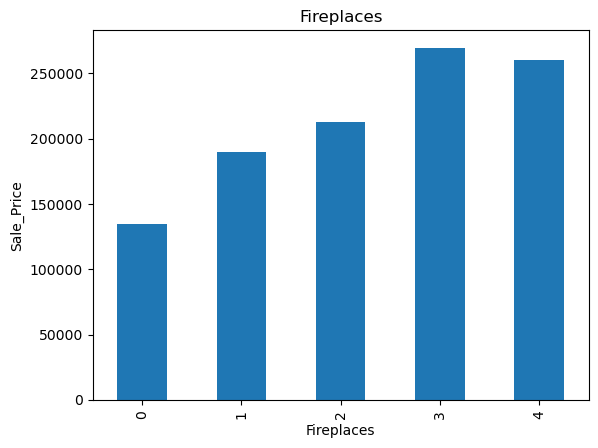

In [18]:
#finding the relationship between discrete_feature and Sale_Price

for feature in discrete_feature:
    #we are copying the main Housing Dataframe, as the actual data should not be affected by it.
    train_dataset.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale_Price')
    plt.title(feature)
    plt.show()

In [19]:
#to find the columns that are continuous.


continuous_feature =[feature for feature in numerical_columns_of_House if feature not in discrete_feature + year_feature]
print("Continuous Variable Count: {}".format(len(continuous_feature)))
continuous_feature

Continuous Variable Count: 8


['Lot_Frontage',
 'Lot_Area',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Longitude',
 'Latitude',
 'Sale_Price']

#### Detecting an outlier

In [20]:
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(train_dataset[numerical_columns_of_House], 25)
Q3 = np.percentile(train_dataset[numerical_columns_of_House], 75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (train_dataset[numerical_columns_of_House] < lower_bound) | (train_dataset[numerical_columns_of_House] > upper_bound)

print("Lower bound is",lower_bound)
print("Upper bound is",upper_bound)
print("IQR = ",IQR)

Lower bound is -1995.125
Upper bound is 3327.875
IQR =  1330.75


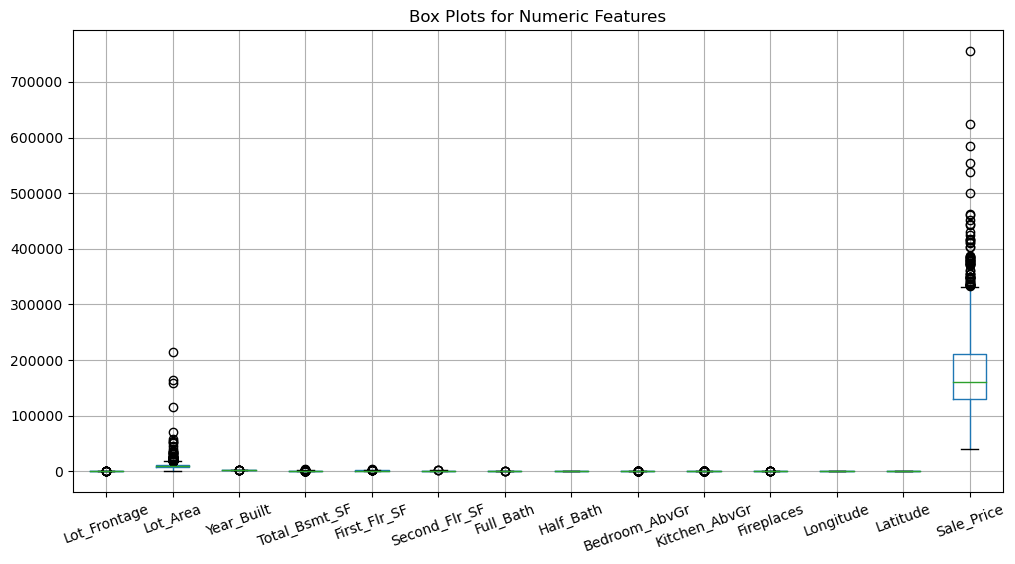

In [21]:
# Convert the list of numerical column into a DataFrame
numeric_columns_df = train_dataset[numerical_columns_of_House]

plt.figure(figsize=(12, 6))
# detecting the outlier of all the numerical column using boxplot 
numeric_columns_df.boxplot()
plt.title("Box Plots for Numeric Features")
plt.xticks(rotation=20)
plt.show()



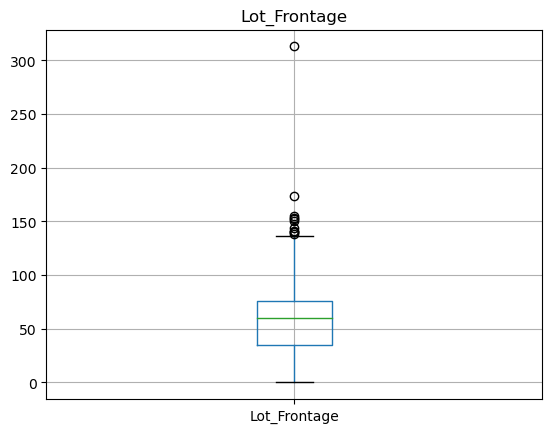

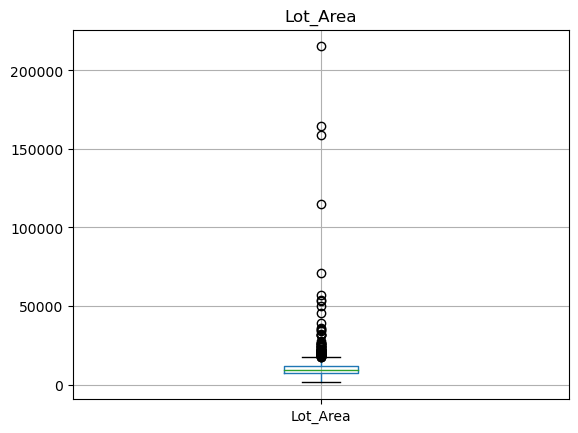

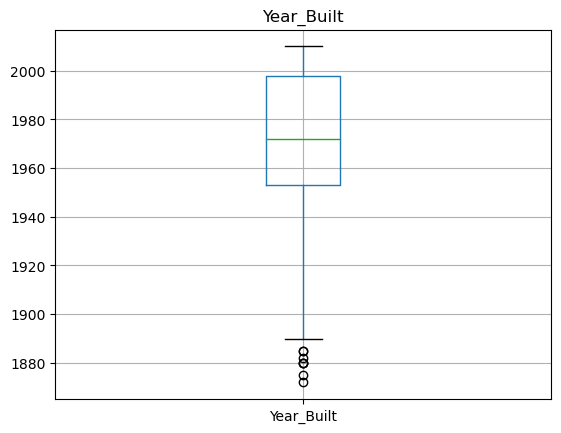

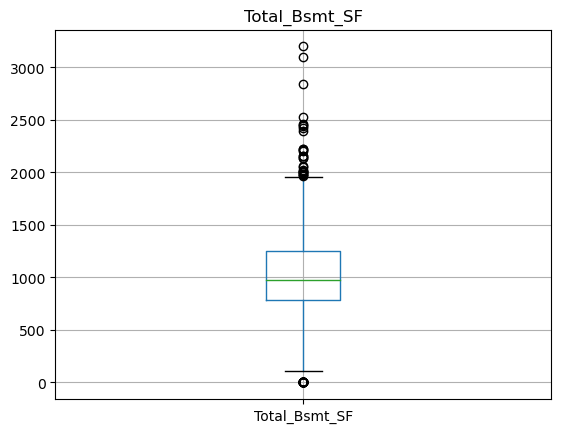

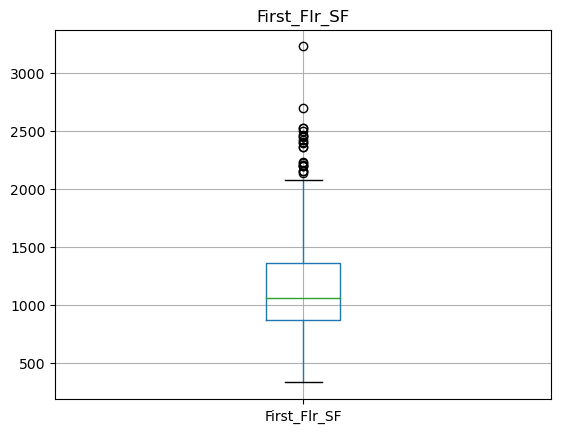

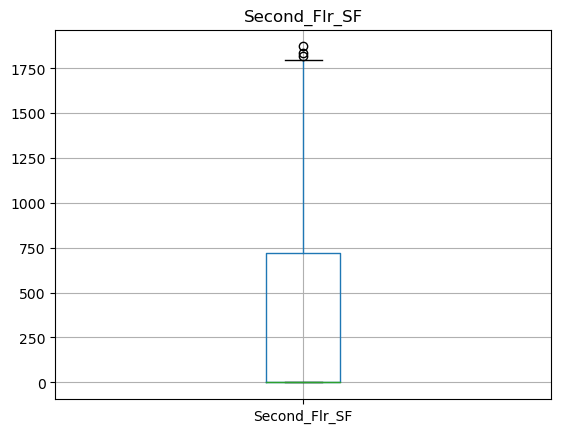

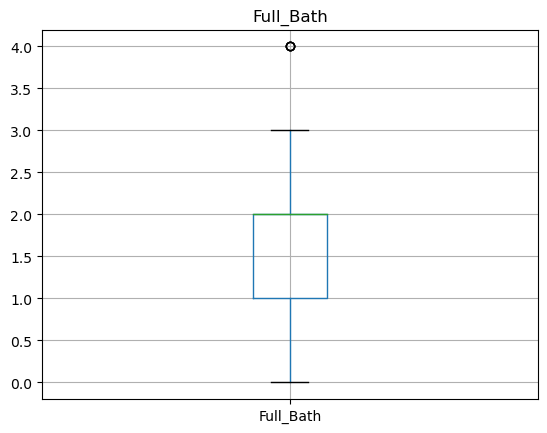

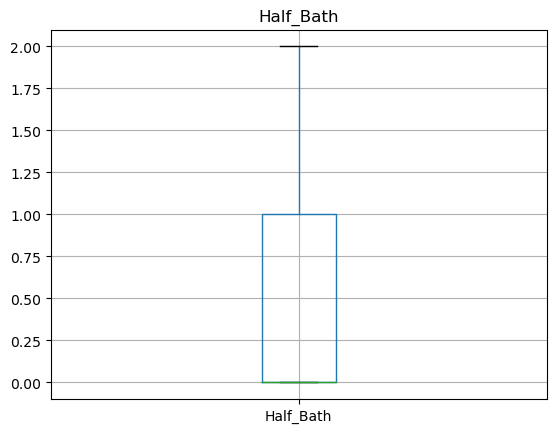

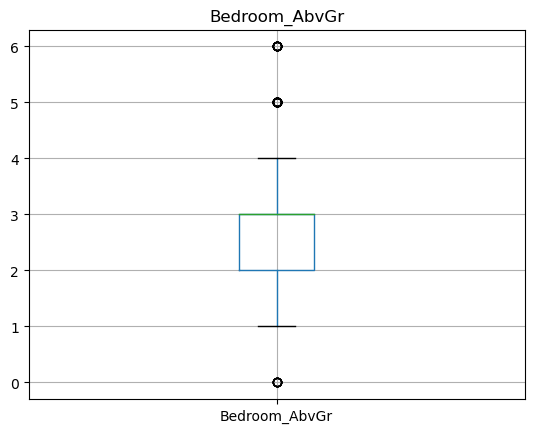

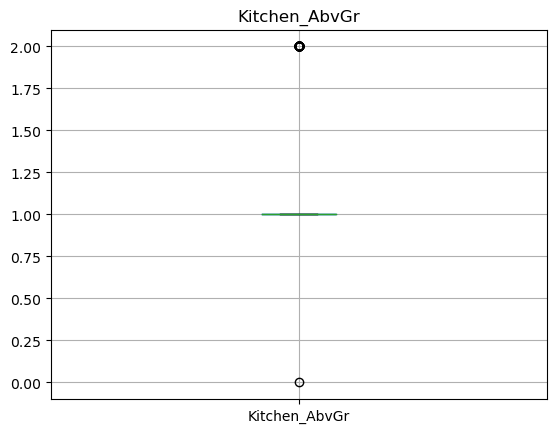

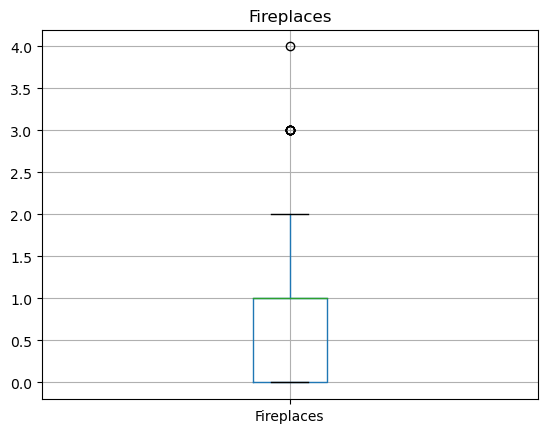

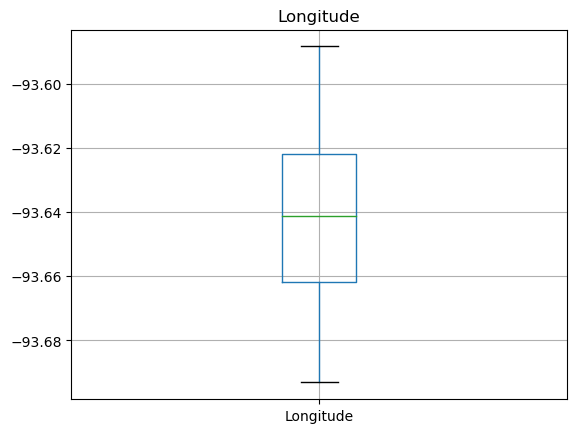

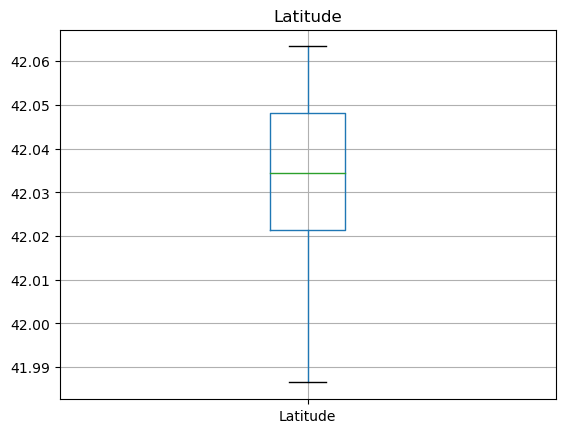

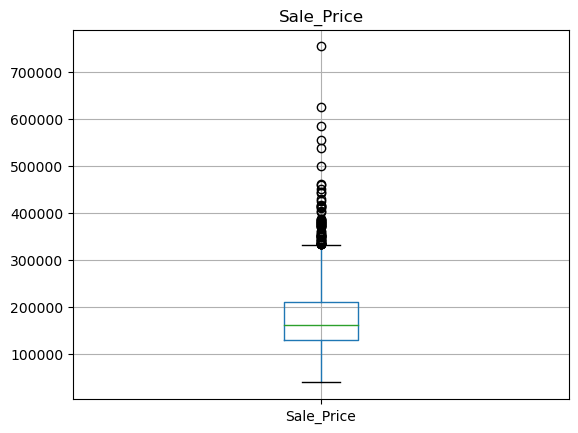

In [22]:
# detecting the outlier individually of each numerical column
for column in train_dataset:
    if column in numerical_columns_of_House:
        plt.figure()
        plt.gca().set_title(column)
        train_dataset.boxplot([column])

<Axes: xlabel='Sale_Price'>

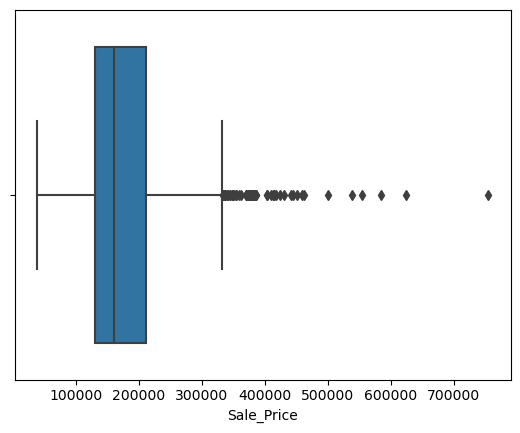

In [23]:
sns.boxplot(x=train_dataset["Sale_Price"])

In [24]:
#sns.pairplot(numeric_columns_df, hue = 'Sale_Price', palette='hls')

#### Checking the correlation data among all the columns

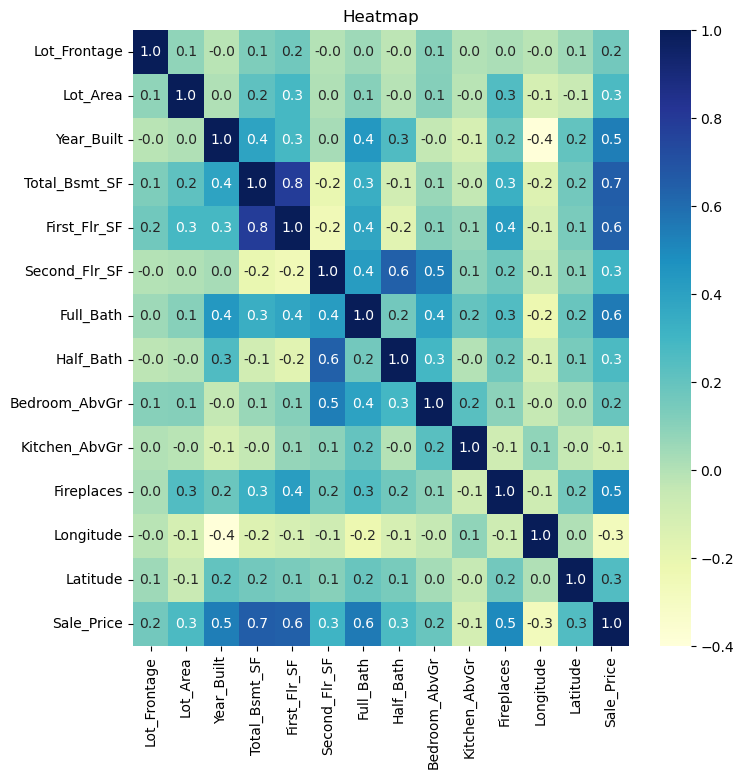

In [25]:
plt.figure(figsize=(8,8))
dataplot = sns.heatmap(numeric_columns_df.corr(), cmap="YlGnBu", annot=True,fmt='.1f') 
plt.title('Heatmap')
plt.show()

In [26]:
#checking the correlation of the numerical column with rspect to the dependent variable i.e. "Sale_Price"
correlation = numeric_columns_df.corr()
print(correlation["Sale_Price"].sort_values(ascending = False),'\n')

Sale_Price       1.000000
Total_Bsmt_SF    0.652714
First_Flr_SF     0.641911
Full_Bath        0.554619
Year_Built       0.538056
Fireplaces       0.496863
Second_Flr_SF    0.310356
Lot_Area         0.269547
Half_Bath        0.267881
Latitude         0.251748
Bedroom_AbvGr    0.187382
Lot_Frontage     0.162625
Kitchen_AbvGr   -0.108666
Longitude       -0.273468
Name: Sale_Price, dtype: float64 



#### Visualisations

<Figure size 1000x1000 with 0 Axes>

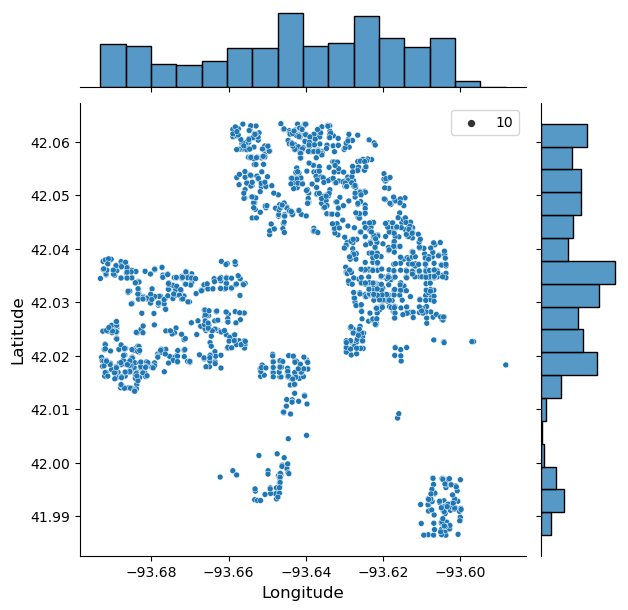

In [27]:
plt.figure(figsize=(10, 10))
sns.jointplot(x=train_dataset.Longitude.values, y=train_dataset.Latitude.values, size=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


Text(0.5, 1.0, 'House Price vs Year Built')

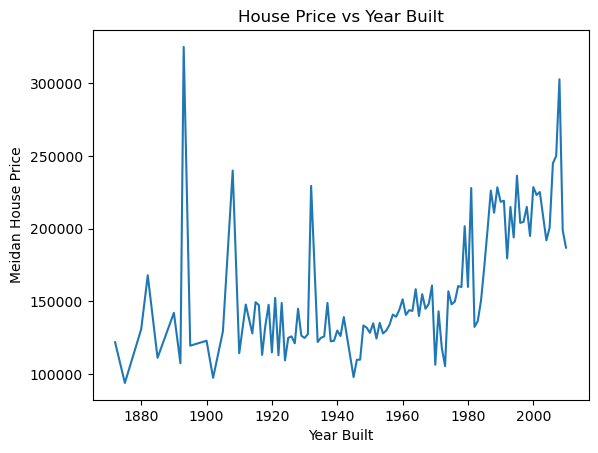

In [28]:
# Finding the relationship between the House Sales Price and year Built
train_dataset.groupby('Year_Built')['Sale_Price'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Meidan House Price')
plt.title('House Price vs Year Built')

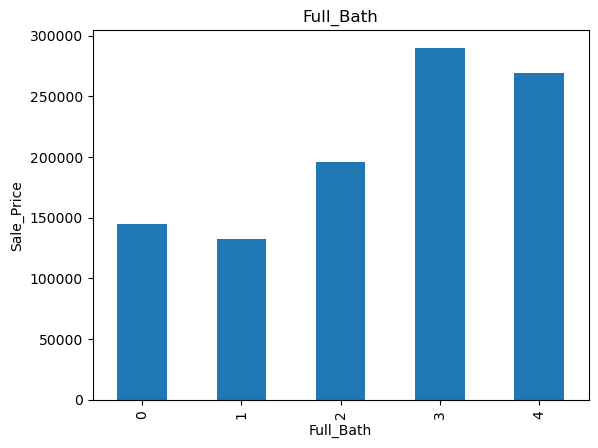

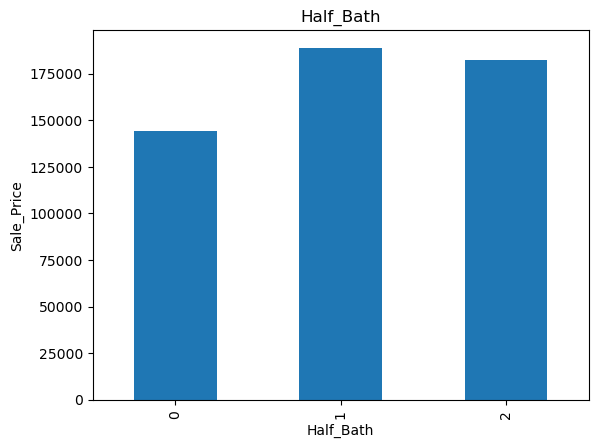

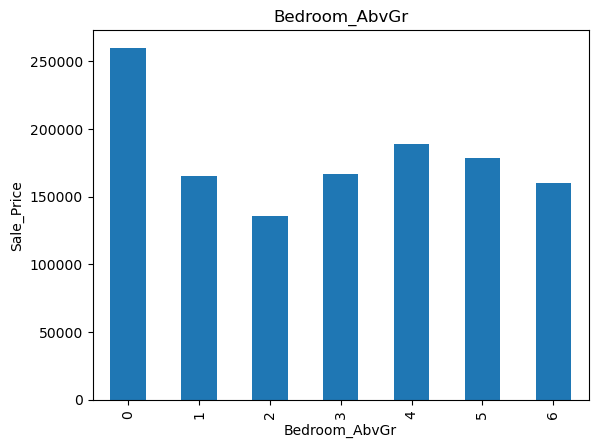

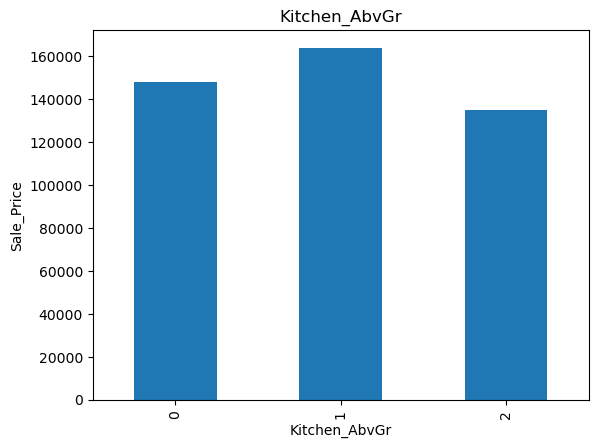

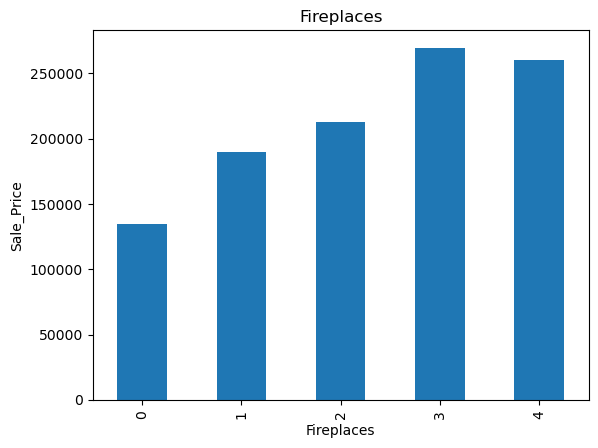

In [29]:
#finding the relationship between discrete_feature and Sale_Price

for feature in discrete_feature:
    train_dataset.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale_Price')
    plt.title(feature)
    plt.show()

<Axes: xlabel='Sale_Price', ylabel='Count'>

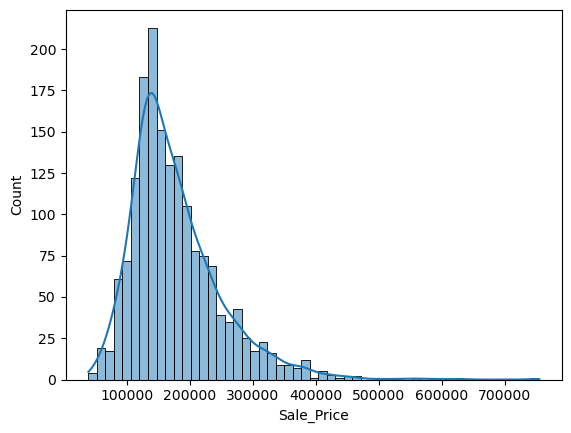

In [30]:
sns.histplot(train_dataset['Sale_Price'], kde =True)

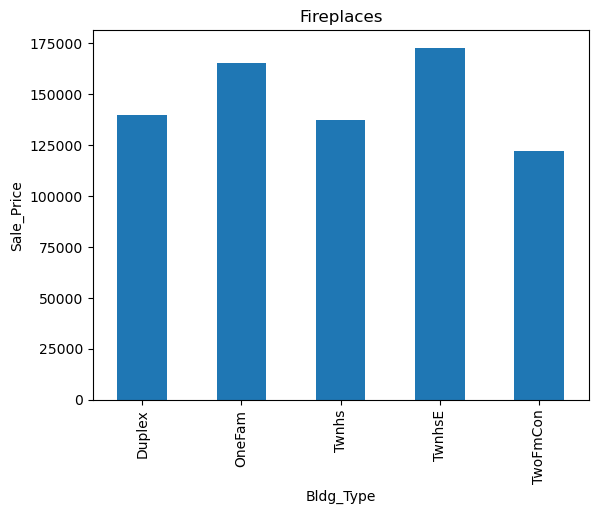

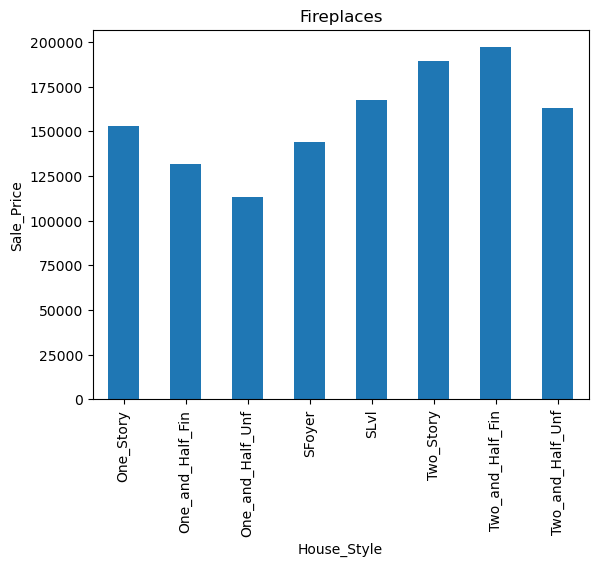

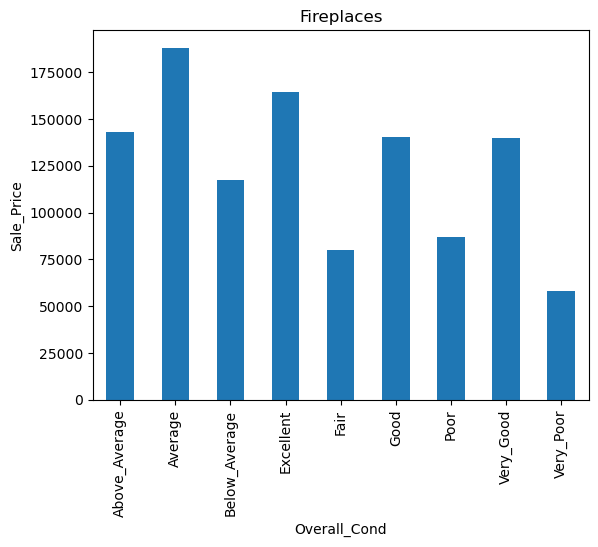

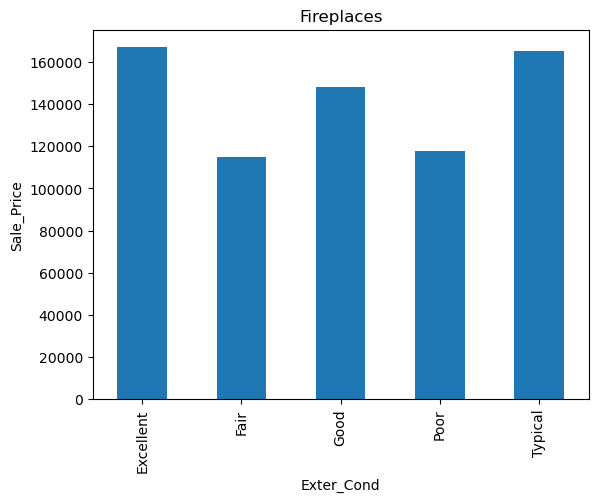

In [31]:
#find the relationship between categorical features and Salesprice

for column in categorical_columns_of_House:
    train_dataset.groupby(column)["Sale_Price"].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel('Sale_Price')
    plt.title(feature)
    plt.show()

<Axes: xlabel='Sale_Price', ylabel='Bldg_Type'>

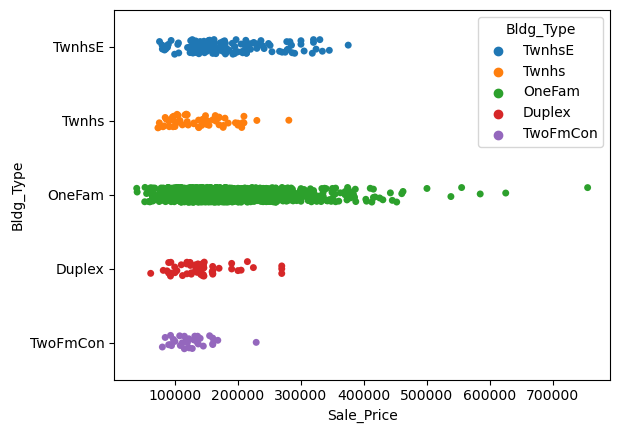

In [32]:
sns.stripplot(data=train_dataset, x="Sale_Price", y="Bldg_Type", hue="Bldg_Type")

<Axes: xlabel='Sale_Price', ylabel='Density'>

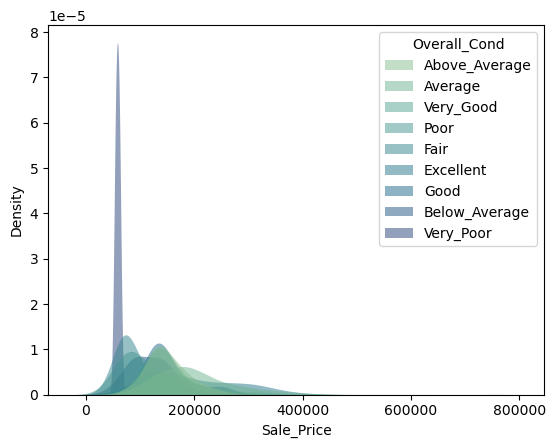

In [33]:
sns.kdeplot(
   data=train_dataset, x="Sale_Price", hue="Overall_Cond",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [34]:
#g = sns.PairGrid(train_dataset)
#g.map(sns.scatterplot)

## Data Preparation

##### Label Encoder

In [35]:
categorical_columns_of_House

['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']

#### Converting Categorical column into numerical column using LabelEncoder for both train and test dataset



In [36]:
X_train.columns

Index(['Lot_Frontage', 'Lot_Area', 'Bldg_Type', 'House_Style', 'Overall_Cond',
       'Year_Built', 'Exter_Cond', 'Total_Bsmt_SF', 'First_Flr_SF',
       'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude'],
      dtype='object')

In [37]:
le = LabelEncoder()

for columns in categorical_columns_of_House:
    X_train[columns] = le.fit_transform(X_train[columns])
    X_test[columns] = le.transform(X_test[columns])


In [38]:
X_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
290,21,1491,3,3,0,1972,4,630,630,0,1,0,1,1,0,-93.603590,41.992119
1994,21,1953,2,5,1,1973,4,483,483,504,1,1,2,1,0,-93.627932,42.052702
2162,60,10800,1,1,7,1936,4,796,1096,370,2,0,3,1,1,-93.613899,42.034761
1971,60,8147,3,0,1,2005,4,1714,1714,0,2,0,2,1,1,-93.630070,42.058563
717,64,7314,1,0,1,2007,4,1232,1232,0,2,0,2,1,0,-93.690111,42.024327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,83,10143,1,0,5,1963,4,1380,1380,0,1,1,3,1,0,-93.607655,42.040150
1570,80,8000,1,5,0,1970,4,1008,1403,1008,2,1,4,1,1,-93.635094,42.047758
27,21,1680,2,5,1,1971,4,483,483,504,1,1,2,1,0,-93.627271,42.051835
2161,60,10800,4,1,2,1900,1,954,1766,648,2,0,3,2,1,-93.612404,42.035277


In [39]:
X_test

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
2190,60,5520,1,1,0,1920,4,1147,1147,510,1,0,4,1,1,-93.618520,42.032144
695,60,9060,1,1,1,1939,4,560,698,560,1,0,2,1,0,-93.661005,42.023548
894,90,13068,1,0,1,1976,4,1211,1211,0,2,0,3,1,1,-93.630299,42.054211
663,60,10320,4,5,5,1915,2,698,754,649,1,1,3,1,0,-93.599575,42.022828
317,0,9765,1,5,7,1993,2,680,680,790,2,1,3,1,1,-93.637046,42.058059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,75,12518,1,0,5,1968,4,1008,1008,0,1,0,3,1,0,-93.604264,41.993540
325,124,16158,1,0,1,2005,4,1530,1530,0,2,0,3,1,1,-93.629357,42.058439
1153,50,9100,1,0,0,1930,4,742,779,0,1,0,2,1,0,-93.625728,42.033380
467,96,10628,1,5,1,2004,4,835,871,941,2,1,3,1,0,-93.691430,42.036001


In [40]:
#X_train = X_train.drop(columns = categorical_columns_of_House)

In [41]:
#X_test = X_test.drop(columns = categorical_columns_of_House)

#### Feature Scaling

In [42]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

X_test_scaled = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [43]:
X_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
290,-1.009948,-0.947257,2.481315,0.416754,-0.923428,0.067037,0.396236,-0.946537,-1.399746,-0.809374,-1.010809,-0.764958,-2.268175,-0.200154,-0.923988,1.490648,-2.214651
1994,-1.009948,-0.897069,1.087587,1.284156,-0.438607,0.100896,0.396236,-1.300636,-1.805709,0.365443,-1.010809,1.210598,-1.049680,-0.200154,-0.923988,0.561819,1.046710
2162,0.143540,0.063998,-0.306142,-0.450649,2.470321,-1.151893,0.396236,-0.546669,-0.112816,0.053091,0.797725,-0.764958,0.168815,-0.200154,0.600051,1.097283,0.080897
1971,0.143540,-0.224202,2.481315,-0.884350,-0.438607,1.184389,0.396236,1.664644,1.593885,-0.809374,0.797725,-0.764958,-1.049680,-0.200154,0.600051,0.480238,1.362230
717,0.261847,-0.314693,-0.306142,-0.884350,-0.438607,1.252107,0.396236,0.503584,0.262769,-0.809374,0.797725,-0.764958,-1.049680,-0.200154,-0.923988,-1.810775,-0.480797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.823802,-0.007373,-0.306142,-0.884350,1.500678,-0.237696,0.396236,0.860092,0.671494,-0.809374,-1.010809,1.210598,0.168815,-0.200154,-0.923988,1.335538,0.371003
1570,0.735073,-0.240171,-0.306142,1.284156,-0.923428,-0.000682,0.396236,-0.035996,0.735012,1.540260,0.797725,1.210598,1.387309,-0.200154,0.600051,0.288535,0.780564
27,-1.009948,-0.926726,1.087587,1.284156,-0.438607,0.033178,0.396236,-1.300636,-1.805709,0.365443,-1.010809,1.210598,-1.049680,-0.200154,-0.923988,0.587041,1.000042
2161,0.143540,0.063998,3.875044,-0.450649,0.046214,-2.370822,-3.314909,-0.166073,1.737491,0.701105,0.797725,-0.764958,0.168815,4.845527,0.600051,1.154328,0.108674


In [44]:
X_test

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
2190,0.115630,-0.800326,-0.328194,-0.375841,-0.875031,-1.639967,0.369357,0.315891,0.053525,0.463668,-0.945375,-0.744075,1.460327,-0.201039,0.641184,0.893801,-0.162199
695,0.115630,-0.123951,-0.328194,-0.375841,-0.381249,-0.991821,0.369357,-1.174183,-1.140515,0.586088,-0.945375,-0.744075,-1.054005,-0.201039,-0.943175,-0.739234,-0.681018
894,1.028229,0.641842,-0.328194,-0.816147,-0.381249,0.270359,0.369357,0.478352,0.223722,-0.785018,0.971856,-0.744075,0.203161,-0.201039,0.641184,0.441041,1.169675
663,0.115630,0.116792,3.722015,1.385381,1.593879,-1.810532,-2.359360,-0.823876,-0.991592,0.803996,-0.945375,1.343950,0.203161,-0.201039,-0.943175,1.622007,-0.724475
317,-1.709569,0.010750,-0.328194,1.385381,2.581443,0.850280,-2.359360,-0.869569,-1.188383,1.149221,0.971856,1.343950,0.203161,-0.201039,0.641184,0.181700,1.401925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.571929,0.536756,-0.328194,-0.816147,1.593879,-0.002544,0.369357,-0.036955,-0.316122,-0.785018,-0.945375,-0.744075,0.203161,-0.201039,-0.943175,1.441780,-2.492197
325,2.062508,1.232237,-0.328194,-0.816147,-0.381249,1.259636,0.369357,1.288119,1.072048,-0.785018,0.971856,-0.744075,0.203161,-0.201039,0.641184,0.477249,1.424860
1153,-0.188570,-0.116309,-0.328194,-0.816147,-0.875031,-1.298838,0.369357,-0.712184,-0.925109,-0.785018,-0.945375,-0.744075,-1.054005,-0.201039,-0.943175,0.616741,-0.087599
467,1.210749,0.175641,-0.328194,1.385381,-0.381249,1.225523,0.369357,-0.476108,-0.680451,1.518930,0.971856,1.343950,0.203161,-0.201039,-0.943175,-1.908707,0.070594


In [45]:
train_dataset = pd.concat([X_train, Y_train], axis =1)

In [46]:
test_dataset = pd.concat([X_test, Y_test], axis = 1)

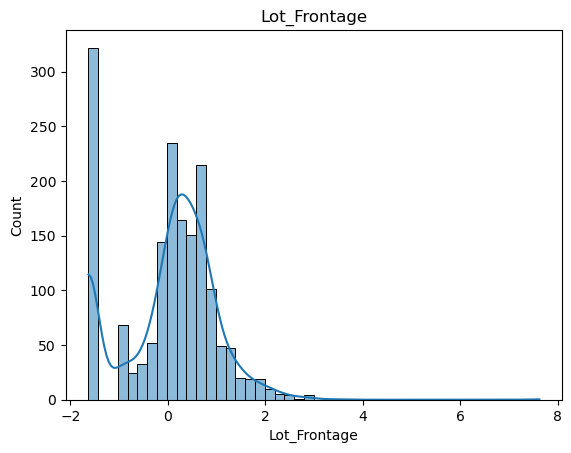

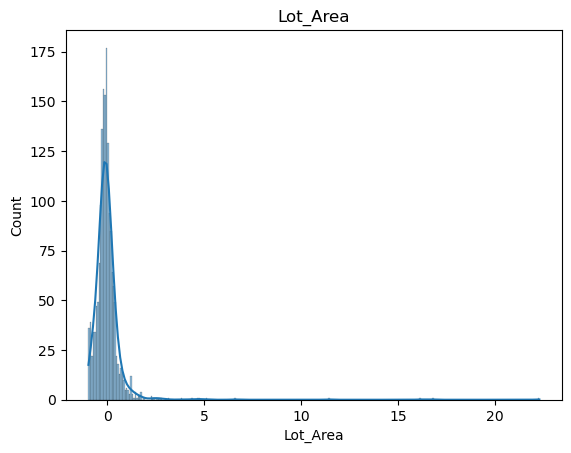

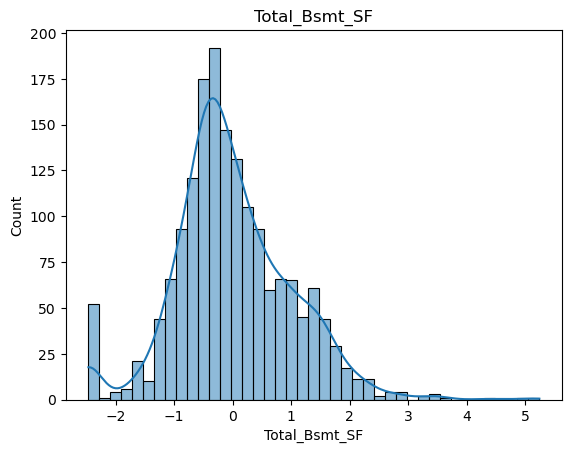

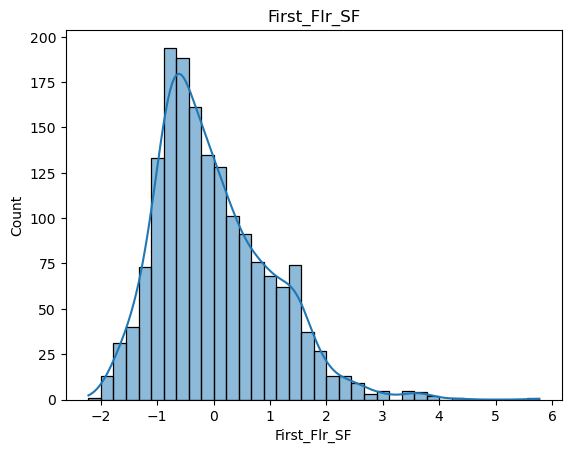

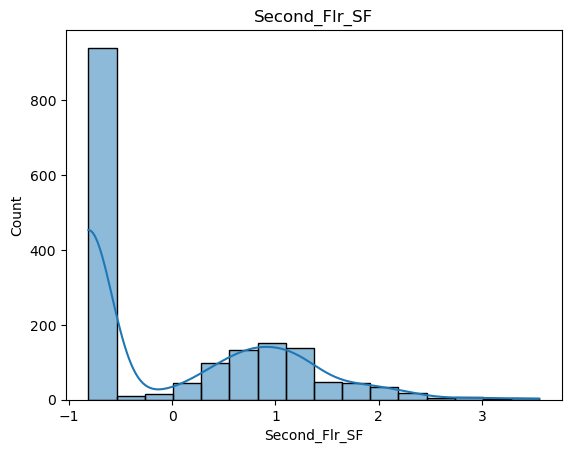

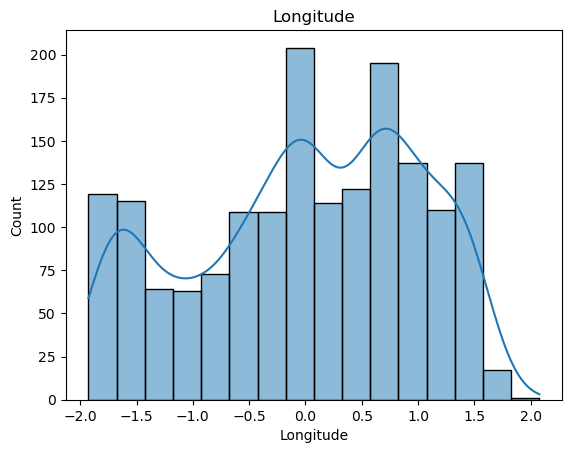

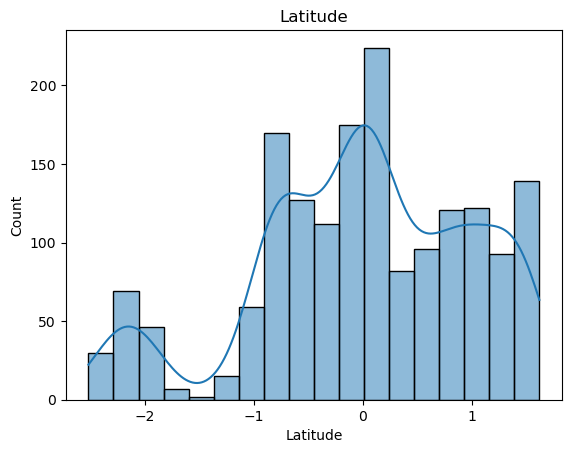

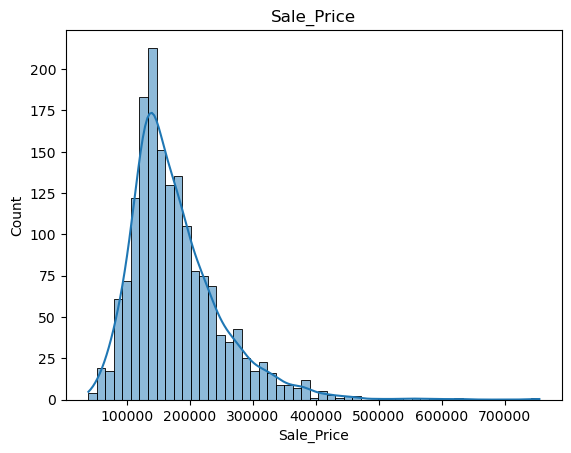

In [47]:
for feature in train_dataset[continuous_feature]:
    sns.histplot(train_dataset[feature], kde =True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Treatment of Outliers

In [48]:
z_scores = np.abs(zscore(train_dataset[continuous_feature]))
threshold = 3
train_dataset = train_dataset[(z_scores < threshold).all(axis=1)]

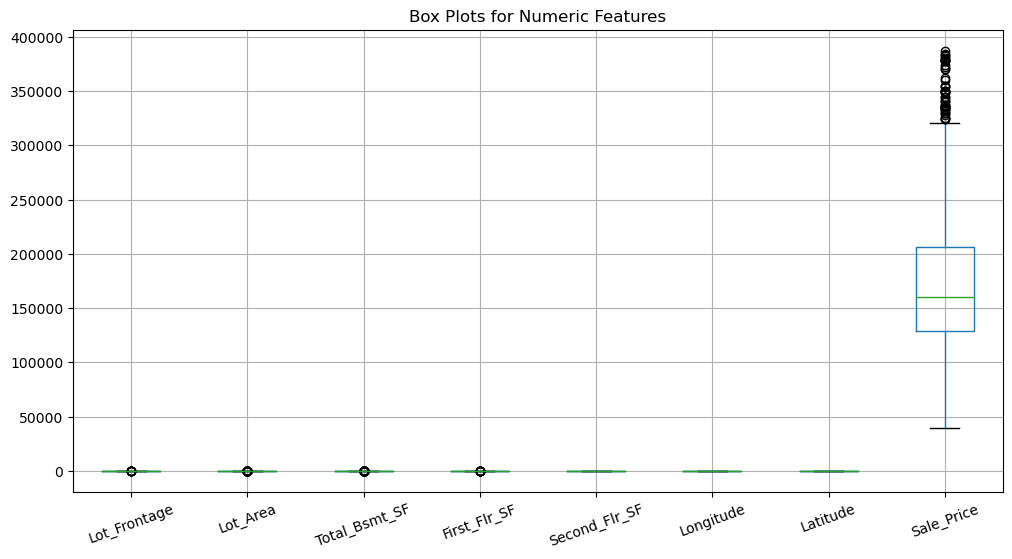

In [49]:
plt.figure(figsize=(12, 6))
# detecting the outlier of all the numerical column using boxplot 
train_dataset[continuous_feature].boxplot()
plt.title("Box Plots for Numeric Features")
plt.xticks(rotation=20)
plt.show()

In [50]:
#Splitting it again into X_train and Y_train 
Y_train = train_dataset['Sale_Price']
X_train = train_dataset.drop(columns=['Sale_Price'])


In [51]:
#Splitting it again into X_test and Y_test
Y_test = test_dataset['Sale_Price']
X_test = test_dataset.drop(columns=['Sale_Price'])

#### Handling multi-collinearity

In [52]:
vif = pd.DataFrame()
vif['variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,variable,VIF
0,Lot_Frontage,1.074732
1,Lot_Area,1.503217
2,Bldg_Type,1.255231
3,House_Style,3.479954
4,Overall_Cond,1.246568
5,Year_Built,2.409629
6,Exter_Cond,1.136517
7,Total_Bsmt_SF,2.755378
8,First_Flr_SF,3.920973
9,Second_Flr_SF,5.574581


In [53]:
X_train = X_train.drop(columns = ['Second_Flr_SF'])
X_test = X_test.drop(columns= ['Second_Flr_SF'])

## Data Modelling

### Model 1 using OLS

In [54]:
X_train = sm.add_constant(X_train)
model1 = sm.OLS(Y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     334.7
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:14:18   Log-Likelihood:                -19339.
No. Observations:                1648   AIC:                         3.871e+04
Df Residuals:                    1631   BIC:                         3.880e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.759e+05    758.608    231.926      0.000    1.74e+05    1.77e+05
Lot_Frontage   3649.7762    799.852      4.563      0.000    2080.931    5218.621
Lot_Area           1e+04   2030.479      4.926      0.000    6019.030     1.4e+04
Bldg_Type      -473.7905    834.311     -0.568      0.570   -2110.225    1162.644
House_Style    1.546e+04   1181.858     13.082      0.000    1.31e+04    1.78e+04
Overall_Cond   6066.3932    832.198      7.290      0.000    4434.103    7698.683
Year_Built     1.432e+04   1117.771     12.816      0.000    1.21e+04    1.65e+04
Exter_Cond     -746.5231    793.075     -0.941      0.347   -2302.076     809.030
Total_Bsmt_SF  1.616e+04   1322.761     12.216      0.000    1.36e+04    1.88e+04
First_Flr_SF   2.264e+04   1557.384     14.536      0.000    1.96e+04    2.57e+04
Full_Bath      1.142e+04   1097.406     10.405      0.000    9266.341    1.36e+04
Half_Bath      8504.9973   1022.069      8.321      0.000    6500.291    1.05e+04
Bedroom_AbvGr -4075.0125    978.025     -4.167      0.000   -5993.330   -2156.695
Kitchen_AbvGr -7466.2392    817.073     -9.138      0.000   -9068.863   -5863.616
Fireplaces     8298.6776    906.320      9.156      0.000    6521.004    1.01e+04
Longitude     -2514.5428    831.589     -3.024      0.003   -4145.637    -883.448
Latitude       2472.6173    792.795      3.119      0.002     917.614    4027.621
==============================================================================
Omnibus:                      146.967   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.671
Skew:                           0.579   Prob(JB):                     4.62e-64
Kurtosis:                       4.705   Cond. No.                         4.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X_test = sm.add_constant(X_test)

##### Homoscedacity

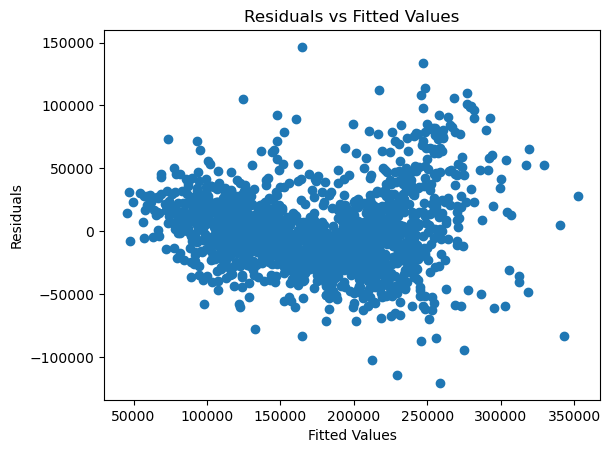

p-value for Breusch-Pagan test: 1.3880236478351503e-46


In [74]:
import statsmodels.api as sm

# Assuming model1 is your fitted OLS model

# Get residuals
residuals_model1 = model1.resid

#checking the homoscedacity assumption of Linear regression
# Scatter plot of residuals against predicted values
plt.scatter(model1.fittedvalues, residuals_model1)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()



# Perform a Breusch-Pagan test for heteroscedasticity
bp_test = sm.stats.diagnostic.het_breuschpagan(model1.resid, model1.model.exog)
print(f'p-value for Breusch-Pagan test: {bp_test[1]}')


##### checking the correlation of Model 1

In [66]:
vif = pd.DataFrame()
vif['variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,variable,VIF
0,const,1.028690
1,Lot_Frontage,1.072740
2,Lot_Area,1.502134
3,Bldg_Type,1.254321
4,House_Style,2.488058
5,Overall_Cond,1.245130
6,Year_Built,2.229308
7,Exter_Cond,1.136498
8,Total_Bsmt_SF,2.749192
9,First_Flr_SF,3.698362


##### checking Normality for Model 1

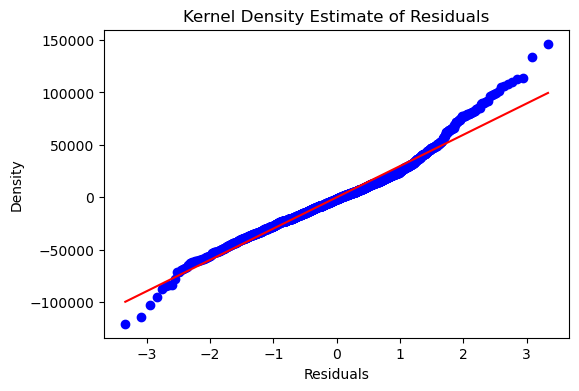

In [75]:
#Q-Q plot
import scipy as sp

fig,ax = plt.subplots(figsize = (6,4))
sp.stats.probplot(residuals_model1, plot=ax, fit= True)
plt.title('Kernel Density Estimate of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

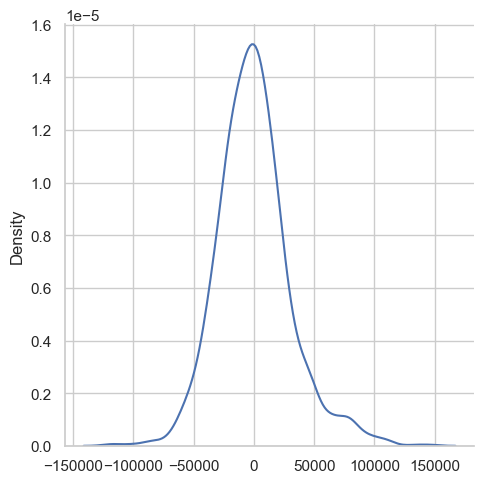

In [91]:
# Assuming you have 'residuals_train' as your array of residuals
sns.set(style="whitegrid")  # Set the style if needed

# Set up the figure with a larger figsize
plt.figure(figsize=(20, 8))

sns.displot(residuals_model1, kind = 'kde')

##### Autocorrlation

In [76]:
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model1.resid)
print(f'Durbin-Watson statistic: {durbin_watson_statistic}')
if durbin_watson_statistic < 1.5:
    print('Positive autocorrelation may be present.')
elif durbin_watson_statistic > 2.5:
    print('Negative autocorrelation may be present.')
else:
    print('No significant autocorrelation detected.')

Durbin-Watson statistic: 2.079742587554648
No significant autocorrelation detected.


##### No influnce data points

In [81]:
influence = OLSInfluence(model1)
cook_distance_values = influence.cooks_distance[0]
print(cook_distance_values)

threshold = 4 / len(cook_distance_values)
influential_observations = [i for i, cook_distance in enumerate(cook_distance_values) if cook_distance > threshold]
print("Influential Observations:", influential_observations)

290     2.353200e-04
1994    5.183085e-04
2162    3.052531e-05
1971    2.321074e-03
717     4.900044e-07
            ...     
583     8.326339e-04
1570    6.261344e-05
27      1.736096e-04
2161    9.119626e-04
641     3.300014e-04
Length: 1648, dtype: float64
Influential Observations: [12, 24, 39, 79, 95, 96, 104, 122, 133, 139, 171, 177, 187, 199, 213, 243, 255, 257, 260, 267, 278, 288, 336, 360, 366, 372, 375, 391, 417, 423, 438, 444, 460, 470, 475, 487, 488, 501, 506, 541, 548, 571, 597, 641, 664, 668, 679, 777, 790, 808, 820, 822, 843, 862, 869, 877, 951, 1000, 1004, 1010, 1018, 1021, 1047, 1058, 1063, 1118, 1119, 1127, 1128, 1141, 1143, 1150, 1161, 1173, 1175, 1180, 1210, 1219, 1240, 1245, 1280, 1294, 1295, 1308, 1319, 1324, 1332, 1343, 1367, 1399, 1427, 1428, 1444, 1455, 1463, 1467, 1475, 1530, 1554, 1582, 1592, 1598, 1602, 1606, 1626, 1627]


In [82]:
X_train = X_train.drop(columns = ['Bldg_Type','Exter_Cond'])
X_test = X_test.drop(columns= ['Bldg_Type','Exter_Cond'])

### Model 2: Using OLS

In [83]:
X_train = sm.add_constant(X_train)
model2 = sm.OLS(Y_train, X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     382.7
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:05:43   Log-Likelihood:                -19339.
No. Observations:                1648   AIC:                         3.871e+04
Df Residuals:                    1633   BIC:                         3.879e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.76e+05    757.586    232.274      0.000    1.74e+05    1.77e+05
Lot_Frontage   3707.9716    792.949      4.676      0.000    2152.666    5263.277
Lot_Area       1.041e+04   1942.684      5.358      0.000    6598.275    1.42e+04
House_Style    1.538e+04   1178.027     13.058      0.000    1.31e+04    1.77e+04
Overall_Cond   6219.8272    819.668      7.588      0.000    4612.116    7827.538
Year_Built     1.413e+04   1098.337     12.868      0.000     1.2e+04    1.63e+04
Total_Bsmt_SF   1.61e+04   1319.544     12.198      0.000    1.35e+04    1.87e+04
First_Flr_SF   2.264e+04   1556.971     14.540      0.000    1.96e+04    2.57e+04
Full_Bath      1.147e+04   1091.082     10.514      0.000    9331.832    1.36e+04
Half_Bath      8559.1612   1020.360      8.388      0.000    6557.809    1.06e+04
Bedroom_AbvGr -3995.2161    959.702     -4.163      0.000   -5877.593   -2112.839
Kitchen_AbvGr -7500.9858    815.020     -9.203      0.000   -9099.580   -5902.392
Fireplaces     8285.1865    905.274      9.152      0.000    6509.566    1.01e+04
Longitude     -2533.7544    830.804     -3.050      0.002   -4163.309    -904.200
Latitude       2383.3720    787.818      3.025      0.003     838.133    3928.611
==============================================================================
Omnibus:                      146.800   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.104
Skew:                           0.579   Prob(JB):                     6.13e-64
Kurtosis:                       4.703   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X_test = sm.add_constant(X_test)

In [85]:
# finding the confidence interval of the model 2
conf_int = model2.conf_int()
conf_int

,0,1
const,174481.229688,177453.114426
Lot_Frontage,2152.666344,5263.276781
Lot_Area,6598.275115,14219.105124
House_Style,13071.523702,17692.731390
Overall_Cond,4612.116492,7827.538001
Year_Built,11979.319127,16287.913533
Total_Bsmt_SF,13507.165308,18683.521042
First_Flr_SF,19584.375371,25692.116940
Full_Bath,9331.832465,13611.967813
Half_Bath,6557.809318,10560.512995


##### Assumption 1: Homoscedacity for Model 2

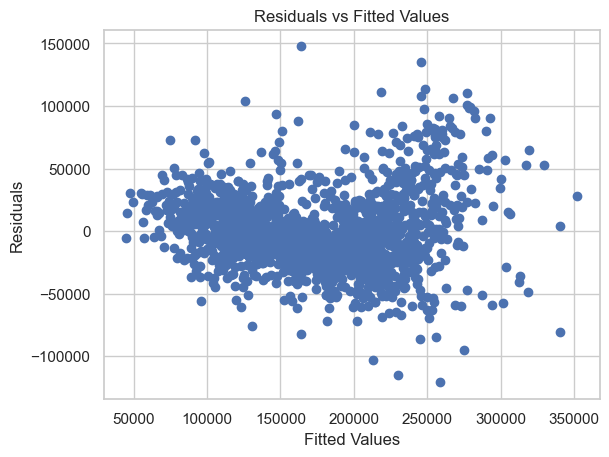

p-value for Breusch-Pagan test: 1.3715591078419606e-45


In [87]:
# Assuming model2 is your fitted OLS model

# Get residuals
residuals_model2 = model2.resid

#checking the homoscedacity assumption of Linear regression
# Scatter plot of residuals against predicted values
plt.scatter(model2.fittedvalues, residuals_model2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()



# Perform a Breusch-Pagan test for heteroscedasticity
bp_test = sm.stats.diagnostic.het_breuschpagan(model1.resid, model2.model.exog)
print(f'p-value for Breusch-Pagan test: {bp_test[1]}')


##### Assumption 2: checking the correlation of Model 2

In [89]:
vif = pd.DataFrame()
vif['variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,variable,VIF
0,const,1.026447
1,Lot_Frontage,1.054848
2,Lot_Area,1.375751
3,House_Style,2.473230
4,Overall_Cond,1.208538
5,Year_Built,2.153572
6,Total_Bsmt_SF,2.737246
7,First_Flr_SF,3.698305
8,Full_Bath,2.048030
9,Half_Bath,1.863300


##### checking Normality for Model 2

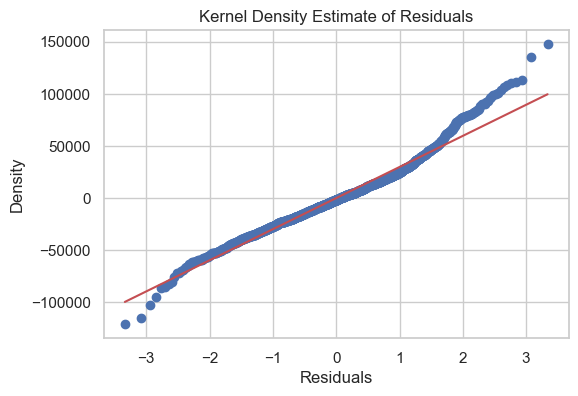

In [90]:
#Q-Q plot
import scipy as sp

fig,ax = plt.subplots(figsize = (6,4))
sp.stats.probplot(residuals_model2, plot=ax, fit= True)
plt.title('Kernel Density Estimate of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

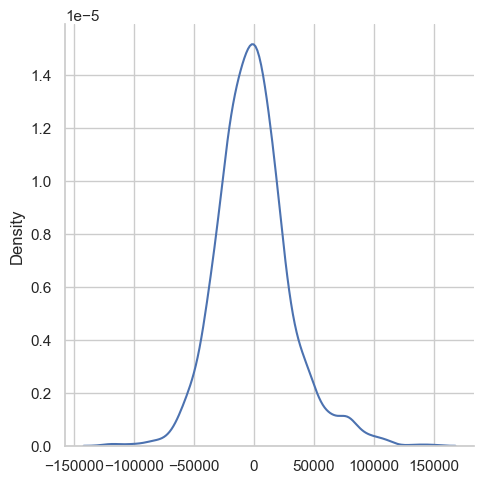

In [92]:
# Assuming you have 'residuals_train' as your array of residuals
sns.set(style="whitegrid")  # Set the style if needed

# Set up the figure with a larger figsize
plt.figure(figsize=(20, 8))

sns.displot(residuals_model2, kind = 'kde')

##### Autocorrelation for model 2

In [93]:
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model2.resid)
print(f'Durbin-Watson statistic: {durbin_watson_statistic}')
if durbin_watson_statistic < 1.5:
    print('Positive autocorrelation may be present.')
elif durbin_watson_statistic > 2.5:
    print('Negative autocorrelation may be present.')
else:
    print('No significant autocorrelation detected.')

Durbin-Watson statistic: 2.078176572772923
No significant autocorrelation detected.


##### No influence data points

In [94]:
influence = OLSInfluence(model2)
cook_distance_values = influence.cooks_distance[0]
print(cook_distance_values)

threshold = 4 / len(cook_distance_values)
influential_observations = [i for i, cook_distance in enumerate(cook_distance_values) if cook_distance > threshold]
print("Influential Observations:", influential_observations)

290     2.645969e-04
1994    5.887831e-04
2162    2.382666e-05
1971    1.727800e-03
717     7.111190e-07
            ...     
583     9.460426e-04
1570    6.977024e-05
27      1.987488e-04
2161    5.819223e-04
641     3.046677e-04
Length: 1648, dtype: float64
Influential Observations: [12, 23, 24, 39, 79, 96, 104, 122, 133, 139, 171, 177, 187, 199, 213, 243, 255, 257, 260, 267, 268, 278, 336, 360, 366, 372, 375, 391, 417, 423, 438, 444, 460, 470, 475, 488, 501, 506, 507, 541, 548, 556, 571, 597, 611, 641, 653, 668, 679, 777, 790, 808, 820, 822, 843, 862, 877, 982, 1000, 1004, 1010, 1018, 1021, 1047, 1058, 1063, 1118, 1119, 1127, 1128, 1136, 1141, 1143, 1150, 1161, 1173, 1175, 1180, 1210, 1219, 1240, 1245, 1276, 1280, 1295, 1308, 1319, 1324, 1332, 1340, 1343, 1367, 1399, 1427, 1428, 1444, 1449, 1455, 1463, 1467, 1477, 1530, 1582, 1592, 1598, 1602, 1606, 1626, 1627]


C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


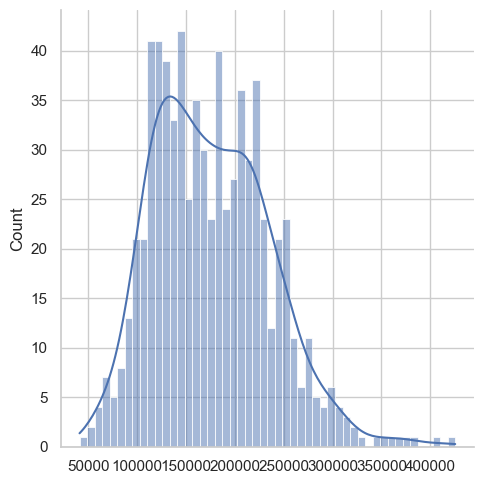

In [105]:
sns.displot((Y_predicted_test_model3), bins=50, kde= True)

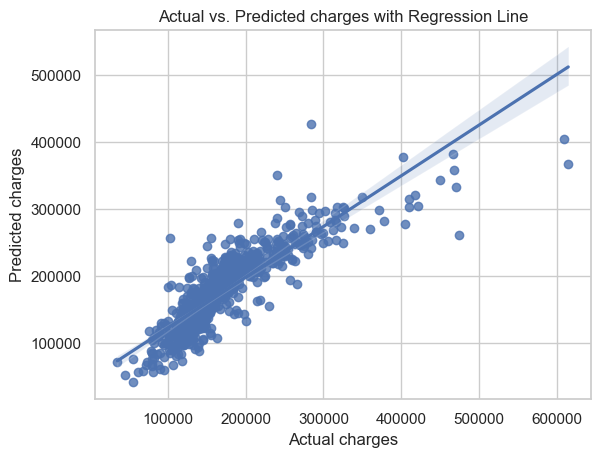

In [106]:
sns.regplot(x=Y_test, y=Y_predicted_test_model3)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs. Predicted charges with Regression Line")
plt.show()

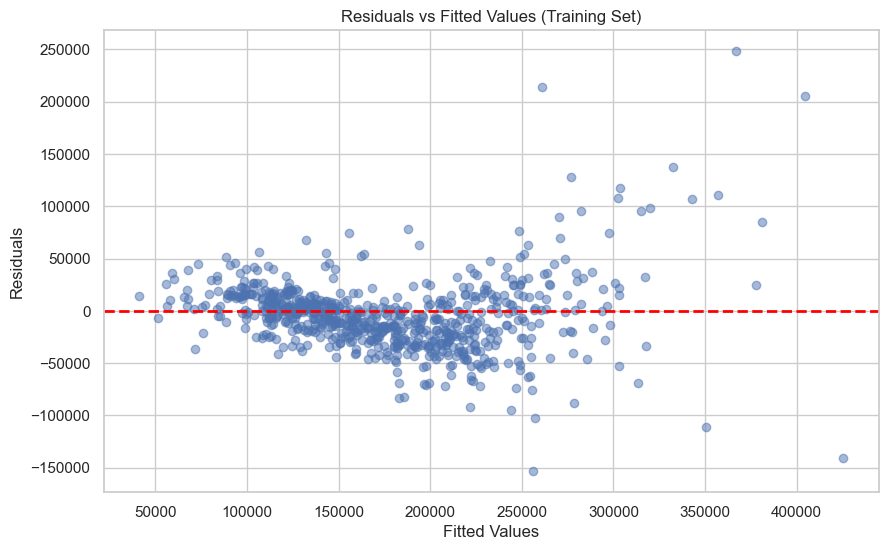

In [107]:
residuals_model3 = Y_test-Y_predicted_test_model3
plt.figure(figsize=(10, 6))
plt.scatter(Y_predicted_test, residuals_model3, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values (Training Set)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Evaluation

In [115]:
MAE = mean_absolute_error(Y_test,Y_predicted_test)
print(MAE)

23698.010924341244


In [116]:
MSE = mean_squared_error(Y_test,Y_predicted_test)
print(MSE)


1196332854.359931


In [117]:
np.sqrt(mean_squared_error(Y_test,Y_predicted_test))

34588.044962962726

# 